<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Profit_and_Loss_Simulator_Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------
FINANCIAL AUTOPSY: ROBOT VS STANDARD
--------------------------------------------------
                                   Duration_Minutes  Margin
BMI_Category         Surgery_Type                          
Non-Obese (BMI < 35) Robot                    104.0  3757.0
                     Standard                 135.0  1921.0
Obese (BMI > 35)     Robot                    179.0  -717.0
                     Standard                 142.0  1470.0


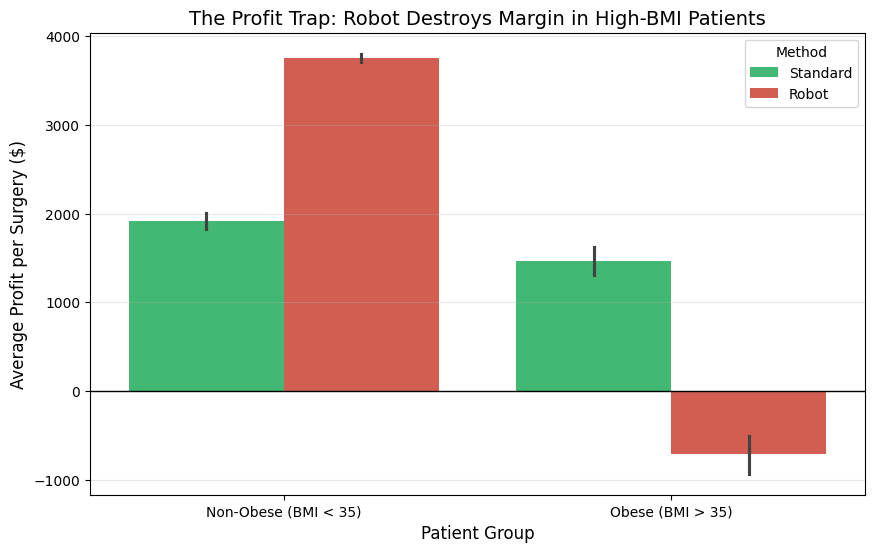


🚨 BUSINESS ALERT 🚨
For patients with BMI > 35:
 - Standard Surgery Profit: $1,470
 - Robotic Surgery Profit:  $-717
 -> WE LOSE $2,187 PER CASE by using the Robot on obese patients.
ACTION: Change protocol immediately. Restrict Robot to BMI < 35.


In [ ]:
# ==========================================
# CASE STUDY 2: THE ROBOTIC ROI ANALYZER
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: GENERATE/LOAD DATA (Simulating the output of your prompt) ---
np.random.seed(42)
n_cases = 500

# Generate BMI
bmi = np.random.normal(30, 8, n_cases)
bmi = np.maximum(bmi, 18) # Floor at 18

# Assign Random Surgery Type (50/50 split)
surgery_type = np.random.choice(['Robot', 'Standard'], size=n_cases)

# Calculate Duration based on the "Obesity Paradox" Logic
duration = []
for i in range(n_cases):
    base_time = 120 + (bmi[i] * 0.5) # Heavier is slightly harder generally

    if surgery_type[i] == 'Standard':
        # Standard surgery is consistent
        time = base_time + np.random.normal(0, 10)
    else:
        # Robot is sensitive to BMI
        if bmi[i] < 35:
            time = base_time - 30 + np.random.normal(0, 5) # Fast!
        else:
            time = base_time + 40 + np.random.normal(0, 15) # Slow/Struggle!
    duration.append(time)

df = pd.DataFrame({'BMI': bmi, 'Surgery_Type': surgery_type, 'Duration_Minutes': duration})

# --- STEP 2: THE BUSINESS LOGIC (Financials) ---
# This is where we leave "Clinical Science" and enter "Finance"
OR_COST_PER_MINUTE = 60  # $60/min overhead
SURGERY_REVENUE = 10000  # Fixed DRG payment

df['Cost'] = df['Duration_Minutes'] * OR_COST_PER_MINUTE
df['Margin'] = SURGERY_REVENUE - df['Cost']
df['BMI_Category'] = np.where(df['BMI'] > 35, 'Obese (BMI > 35)', 'Non-Obese (BMI < 35)')

# --- STEP 3: THE "CFO's VIEW" (Analysis) ---
print("-" * 50)
print("FINANCIAL AUTOPSY: ROBOT VS STANDARD")
print("-" * 50)

# Group by the BMI Category to find the leak
financials = df.groupby(['BMI_Category', 'Surgery_Type'])[['Duration_Minutes', 'Margin']].mean().round(0)
print(financials)

# --- STEP 4: VISUALIZE THE LEAK ---
plt.figure(figsize=(10, 6))

# We plot MARGIN, not just time. Business leaders care about the green bar.
sns.barplot(data=df, x='BMI_Category', y='Margin', hue='Surgery_Type', palette=['#2ecc71', '#e74c3c'])

plt.title('The Profit Trap: Robot Destroys Margin in High-BMI Patients', fontsize=14)
plt.ylabel('Average Profit per Surgery ($)', fontsize=12)
plt.xlabel('Patient Group', fontsize=12)
plt.axhline(y=0, color='black', linewidth=1)
plt.legend(title='Method')
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- STEP 5: THE BUSINESS VERDICT ---
# Calculate the specific loss
obese_robot_margin = df[(df['BMI']>35) & (df['Surgery_Type']=='Robot')]['Margin'].mean()
obese_standard_margin = df[(df['BMI']>35) & (df['Surgery_Type']=='Standard')]['Margin'].mean()
loss_per_case = obese_standard_margin - obese_robot_margin

print("\n" + "="*50)
print(f"🚨 BUSINESS ALERT 🚨")
print(f"For patients with BMI > 35:")
print(f" - Standard Surgery Profit: ${obese_standard_margin:,.0f}")
print(f" - Robotic Surgery Profit:  ${obese_robot_margin:,.0f}")
print(f" -> WE LOSE ${loss_per_case:,.0f} PER CASE by using the Robot on obese patients.")
print(f"ACTION: Change protocol immediately. Restrict Robot to BMI < 35.")
print("="*50)